In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras_tuner import RandomSearch


In [5]:
Trails=3 # Number of models to train
epochs=2 # number of epoch per model

In [6]:
(xtrain,ytrain),(xval,yval)=mnist.load_data()
xtrain=np.expand_dims(xtrain.astype('float32')/255.,-1)
xval=np.expand_dims(xval.astype('float32')/255.,-1)
ytrain=to_categorical(ytrain,10)
yval=to_categorical(yval,10)

In [42]:
def build_model (hp):
    """
    Function is build a TF model based on hyperparameter values
    Args:
        hp(hyperparameter): values
    Returns:
        Model: compiled model
    """
    num_layers=hp.Int('num_layers',2,8, default=6)
    lr=hp.Choice('learning_rate', [0.0001,0.05])
    inputs=layers.Input(shape=(28,28,1))
    x=inputs
    for idx in range(num_layers):
        idx=str(idx)

        filters=hp.Int('filters_'+idx, 32,256, step=32, default=64) 
        x=layers.Conv2D(filters-filters, kernel_size=3,padding='same',activation='relu')(x)

        if x.shape[1]>=8:
                pool_type=hp.Choice('pool_'+idx, values=['max','avg'])
                if pool_type=='max':
                    x=layers.MaxPooling2D(2)(x)
                elif pool_type =='avg':
                    x=layers.AveragePooling2D(2)(x)

    x=layers.Flatten()(x)
    outputs=layers.Dense(10,activation='softmax')(x)
#Build model
    model=keras.Model(inputs, outputs)
    model.compile(optimizer-Adam (lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return model        
                                                                            

In [8]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model-building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu',input_shape=(32,)))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_tuning_directory',
    project_name='helloworld'
)

# Perform the hyperparameter search
tuner.search(xtrain,ytrain, epochs=10, validation_data=(xval,yval))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps}")


C:\Users\thama\AppData\Local\Temp\ipykernel_14232\4177103927.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Reloading Tuner from my_tuning_directory\helloworld\tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
352               |352               |units



Epoch 1/10


Traceback (most recent call last):
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thama\anacon

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thama\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\thama\AppData\Local\Temp\__autograph_generated_filen25af_0h.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "C:\Users\thama\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\thama\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\thama\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\thama\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\thama\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\thama\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 32), found shape=(32, 28, 28, 1)



In [9]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [ ]:
tuner.results_summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import GridSearchCV
import KerasClassifier


# Define the neural network architecture
def create_model(activation='relu', optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Dense(128, activation=activation, input_shape=(input_size,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(output_size, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn compatible wrapper
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print(f"Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10

# Define a simple convolutional neural network
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 16 * 16, 10)  # Adjust the input size based on your input shape

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.fc1(x)
        return x

# Set up data transformations and loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Instantiate the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(5):  # Adjust the number of epochs as needed
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Save the trained model
torch.save(model.state_dict(), 'simple_cnn.pth')

In [74]:
pip install torchvision


  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/13/24/23cdf7e7dc33e5c01588c315f8424d31afa9edb05a80168f3d44f7178ff7/torchvision-0.16.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 1.7 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.1 MB 2.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.1 MB 3.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 3.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 3.3 MB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.1 MB 2.8 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 2.5 MB/s eta 0:00:01
   -------------------------------- ------- 0.9/1.1 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 2.8 MB/s eta 0:00:01
   ---------------------------

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

In [79]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4

trainset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


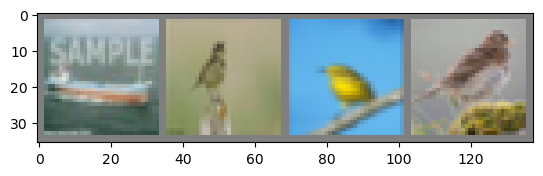

ship bird bird bird 


In [80]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img=img/ 2 + 0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#get some random training images
dataiter=iter(trainloader)
images, labels = next(dataiter)

#show images
imshow(torchvision.utils.make_grid(images))

# print Labels
print(''.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [82]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def _init_(self):
        super()._init_()
        self.conv1 =nn.Conv2d(3, 6, 5)
        self.pool=nn.MaxPool2d(2, 2)
        self.conv2 =nn.Conv2d(6, 16, 5) 
        self.fc1=nn.Linear(1655, 120)
        self.fc2=nn.Linear(120, 84)
        self.fc3 =nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x))) 
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net=Net()

In [ ]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2): # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        net(inputs) outputs = net
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches 
            print(f'[{epoch + 1}, {1 + 1:5d}] loss: {running_loss/2000: }')
            running_loss = 0.0

print('Finished Training')

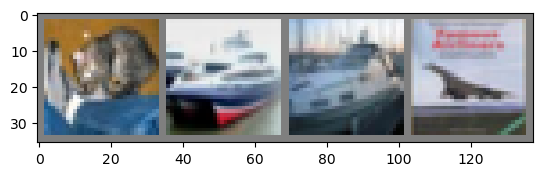

GroundTruth:  cat   ship  ship  plane


In [96]:
dataiter=iter(testloader)

images, labels = next(dataiter)

# print images

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
net=Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
correct=0

total=0

#since we're not training, we don't need to calculate the gradients for o 
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs=net(images)
        # the class with the highest energy
        _,prediction= torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: ')

In [ ]:
#prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred={classname: 0 for classname in classes}

#again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs=net(images)
        _,predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes [label]] += 1
                total_pred[classes [label]] += 1

#print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy=100*float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')